Customer churn rate:- is the defined as the rate at which customer are leaving the bank.

Churn rate is calculated by using the following formula:-

Churn rate = (Customer at the beginning of the month - Customer at the end of the month)/(Customer at the beginning of the month)

churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

###### Aim is to Predict the Customer Churn for ABC Bank.


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

import itertools

In [2]:
# load the data
data = pd.read_csv('data/Bank Customer Churn Prediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Feature Description:

    Customer ID - Unique ID given to identify a particular customer.
    Credit Score - It is the score which determines the creditworthiness of a customer.
    Country - The country where customer lives.
    Gender - The Sex of customer.
    Age - The age of customer.
    Tenure - Number of years the customer has Bank Account in that Bank.
    Balance - Amount of money present in customer's bank.
    Products Number - Number of Products from that Bank.
    Credit Card - Does the customer own a credit card of that Bank.
    Active Member - Whether the customer is an active member of that Bank.
    Estimated Salary - Total Income of the Customer.
    Churn - Churn (Loss of existing customers) of the Bank.

In [3]:
data.shape

(10000, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# Null value distribution
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [7]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

Observation
1.There is no null values.
2.There are 10 quantitative feature and 2 qualitative feature

In [8]:
df = data.copy()
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# remove unnecessary columns

In [10]:
df.drop(['customer_id'],axis=1,inplace=True)

<AxesSubplot:>

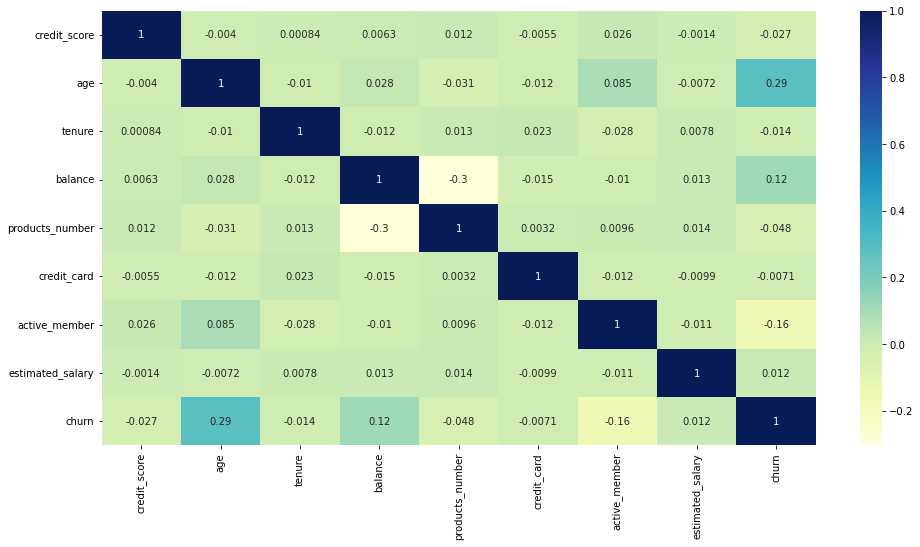

In [11]:
# correlations
corr = df.corr()
fig , ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)
sns.heatmap(corr,annot=True,cmap="YlGnBu")

There is no correlation between any variables

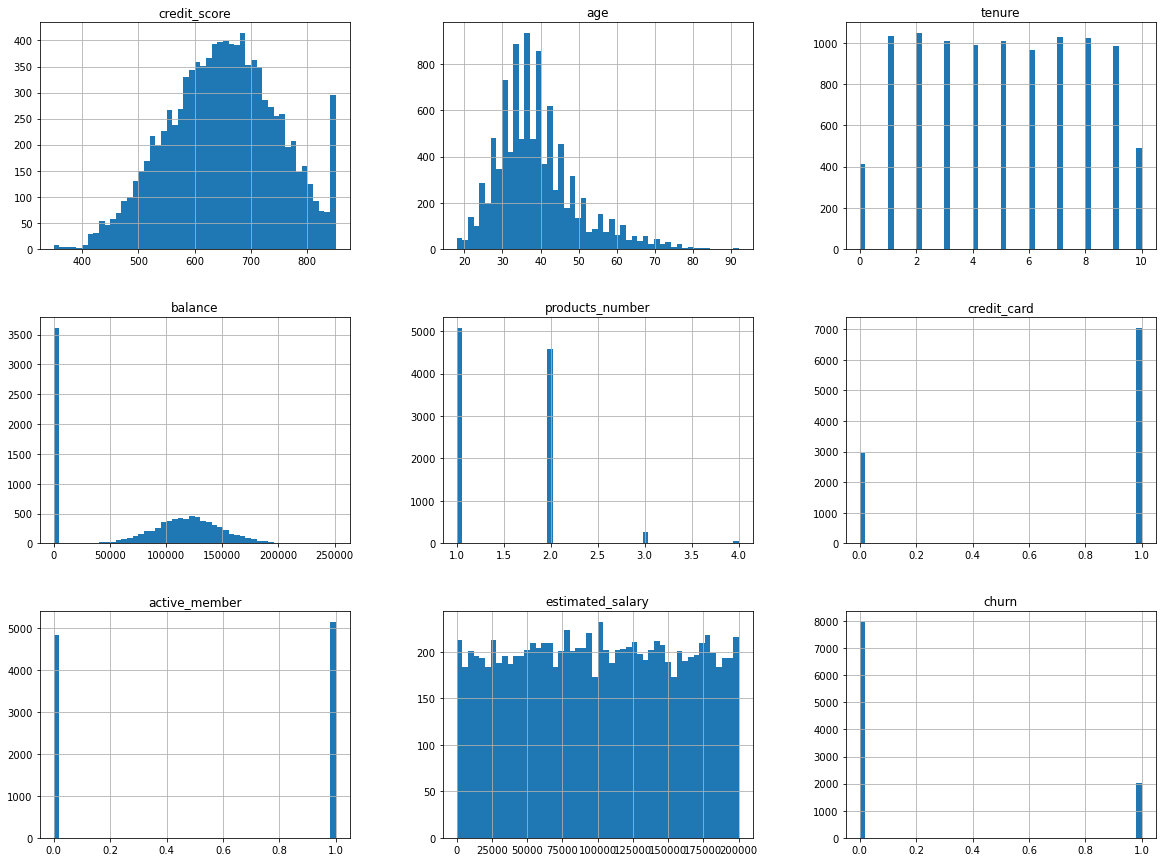

In [12]:
# Visualization

df.hist(bins=50, figsize=(20,15))
# x-axis is column Values and Y-axis is Total Counts
plt.show()

<AxesSubplot:xlabel='balance', ylabel='age'>

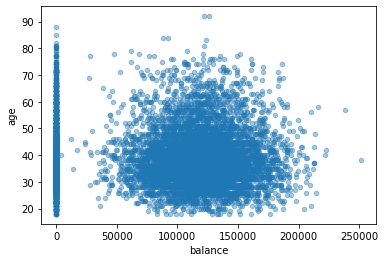

In [13]:
df.plot(kind="scatter", x="balance", y="age", alpha=0.4)

<AxesSubplot:xlabel='balance', ylabel='estimated_salary'>

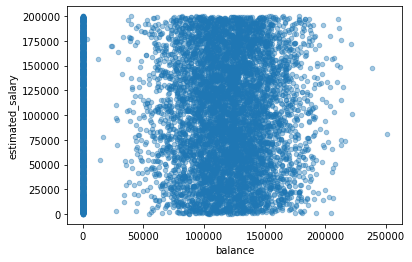

In [14]:
df.plot(kind="scatter", x="balance", y="estimated_salary", alpha=0.4)

<AxesSubplot:xlabel='age', ylabel='estimated_salary'>

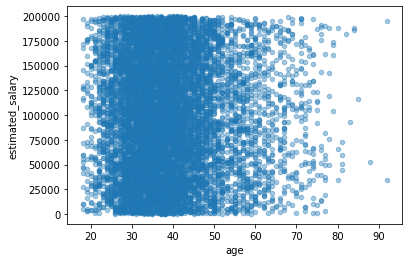

In [15]:
df.plot(kind="scatter", x="age", y="estimated_salary", alpha=0.4)

<AxesSubplot:xlabel='churn', ylabel='count'>

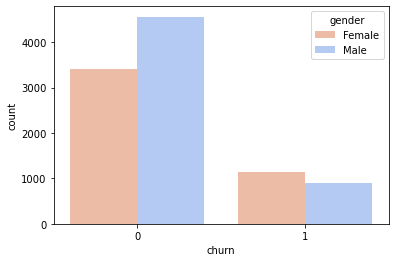

In [16]:
sns.countplot(x='churn', data=df, hue='gender', palette="coolwarm_r")

From the above graph, we can see that gender is not a contributing factor for customer churn in this data set as the numbers of both the genders, that have or haven’t churned, are almost the same.

In [17]:
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [18]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

Observations

* There are total of 12 columns and 10000 rows in data.
* Data contains no missing value.
* Drop Customer ID feature as it is of no use.
* Churn is the Target Variable.
* The data is of people from 3 countries, which are France,Germany and Spain.


Convert categorical variable such as country and gender into numerical manually because of less categories

In [19]:
df['gender'] = df['gender'].map({'Male':0,'Female':1})
df['country'] = df['country'].map({'France':0, 'Germany':1, 'Spain':2})

In [20]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


[Text(0.5, 0, 'Tenure in Months'), Text(0, 0.5, 'Count')]

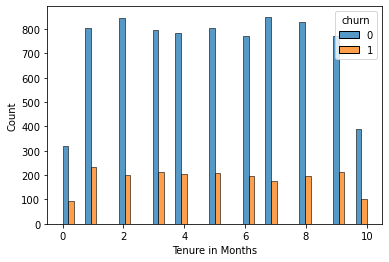

In [21]:
ax = sns.histplot(x='tenure', hue='churn', data=df, multiple='dodge')
ax.set(xlabel="Tenure in Months", ylabel='Count')

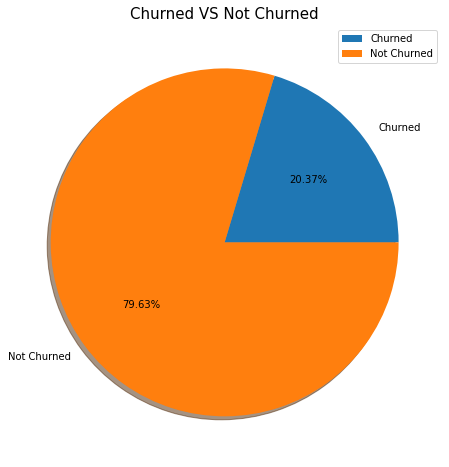

In [22]:
sizes = [data.churn[data['churn']==1].count(), data.churn[data['churn']==0].count()]
labels = ['Churned', 'Not Churned']
figure, axes = plt.subplots(figsize=(10, 8))
axes.pie(sizes, labels=labels,shadow=True,autopct = '%1.2f%%')
plt.legend()
plt.title("Churned VS Not Churned", size = 15)
plt.show()

In [23]:
#Scaling
# important to increase prediction accuracy
from sklearn.preprocessing import MinMaxScaler
features = df.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(df)

MinMaxScaler()

In [24]:
# independent and dependent variables
X = df.drop('churn',axis=1)
y = df['churn']

In [25]:
# Prediction
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

### Logistic Regression

In [26]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print("Accuracy Score",accuracy_score(y_test,y_pred)*100,"%")

Accuracy Score 78.63333333333333 %


### Random Forest using RandomCV

In [27]:
# random forest using RandomCV

from sklearn.ensemble import RandomForestClassifier
rf_c=RandomForestClassifier()

In [28]:
param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1200,num=11)],
            'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}

In [29]:
from sklearn.model_selection import RandomizedSearchCV
random_cv=RandomizedSearchCV(rf_c,param_grid,cv=3,verbose=2,random_state=42)
random_cv.fit(X_train,y_train)
best_random=random_cv.best_estimator_
accuracy = random_cv.score(X_test,y_test)
print("Random Forest",(accuracy))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   6.0s
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   5.6s
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   6.8s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   6.4s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   6.8s
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=  10.5s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   2.2s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estima

### XGBoost

In [30]:
# XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
print("Accuracy Score ",accuracy_score(y_test,y_pred)*100,"%")

Accuracy Score  85.46666666666667 %


### Decision Tree

In [31]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)
print("Accuracy Score",accuracy_score(y_test,y_pred)*100,"%")

Accuracy Score 79.7 %


### Decision Tree with Hyperparameter Tuning

In [32]:
# decision tree with hyperparameter tuning
dt_model_hyper = DecisionTreeClassifier(max_depth=10)
dt_model_hyper.fit(X_train,y_train)
y_pred = dt_model_hyper.predict(X_test)
print("Accuracy Score ",accuracy_score(y_test,y_pred)*100,"%")

Accuracy Score  83.2 %


In [33]:
prediction_hyper = dt_model_hyper.predict(X_test)

In [34]:
cnf_matrix_hyper = confusion_matrix(y_test,prediction_hyper)
np.set_printoptions(precision=2)
cnf_matrix_hyper

array([[2214,  169],
       [ 335,  282]], dtype=int64)

### SVM

In [35]:
# SVM
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train,y_train)

SVC()

In [36]:
y_pred = svm_model.predict(X_test)
print("SVM",accuracy_score(y_test,y_pred)*100,"%")

SVM 79.43333333333334 %


### K Nearest Neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Function for creating model pipelines - imblearn
from imblearn.pipeline import make_pipeline as imbl_pipe

# Over-sampling using SMOTE
from imblearn.over_sampling import SMOTE


# Function for creating model pipelines - sklearn
from sklearn.pipeline import make_pipeline



In [38]:
# Import classifier
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print("KNN accuracy:",accuracy_score(y_test,y_pred)*100,"%")
     


KNN accuracy: 78.53333333333333 %


### Random Forest

In [39]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 85.96666666666667 %


In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
# Random Forest
y_pred = rfc.predict(X_test)
print("Classification report","\n",classification_report(y_test,y_pred))

Classification report 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2383
           1       0.76      0.47      0.58       617

    accuracy                           0.86      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



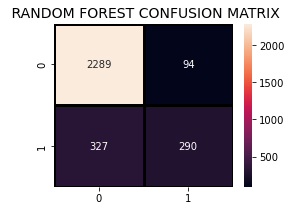

In [43]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()



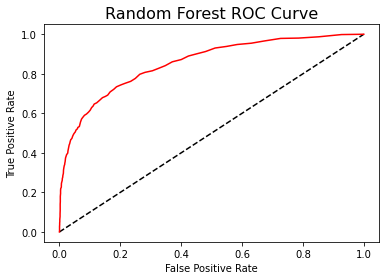

In [44]:
from sklearn.metrics import roc_curve
y_rfpred_prob = rfc.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

### AdaBoost Classifier

In [45]:
from sklearn.ensemble import AdaBoostClassifier
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
y_pred = a_model.predict(X_test)
print("AdaBoost Classifier accuracy",accuracy_score(y_test, y_pred)*100,"%")

AdaBoost Classifier accuracy 85.33333333333334 %


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2383
           1       0.71      0.48      0.57       617

    accuracy                           0.85      3000
   macro avg       0.79      0.72      0.74      3000
weighted avg       0.84      0.85      0.84      3000



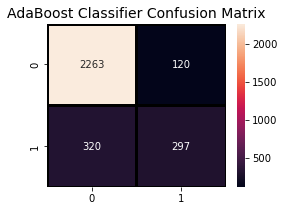

In [47]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

### Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, y_pred)*100,"%")

Gradient Boosting Classifier 86.4 %


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2383
           1       0.77      0.48      0.59       617

    accuracy                           0.86      3000
   macro avg       0.82      0.72      0.76      3000
weighted avg       0.86      0.86      0.85      3000



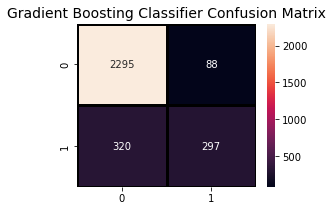

In [50]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()